In [22]:
import csv
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [23]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv")
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [24]:
df.rename(columns={'1': 'ID NUMBER', '1.52101': 'refractive index','13.64':'Na','4.49':'Magnesium','1.10':'Aluminum','71.78':'Silicon','0.06':'Potassium','8.75':'Calcium','0.00':'Barium','0.00.1':'Barium','1.1':'target'}, inplace=True)
df

,ID NUMBER,refractive index,Na,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Barium,target
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [25]:
df.shape

(213, 11)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID NUMBER         213 non-null    int64  
 1   refractive index  213 non-null    float64
 2   Na                213 non-null    float64
 3   Magnesium         213 non-null    float64
 4   Aluminum          213 non-null    float64
 5   Silicon           213 non-null    float64
 6   Potassium         213 non-null    float64
 7   Calcium           213 non-null    float64
 8   Barium            213 non-null    float64
 9   Barium            213 non-null    float64
 10  target            213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [27]:
df.drop(columns=['ID NUMBER'],axis=1,inplace=True)

In [28]:
df.isnull().sum()

refractive index    0
Na                  0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Barium              0
target              0
dtype: int64

In [29]:
df.describe()

,refractive index,Na,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Barium,target
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [30]:
df.corr()

,refractive index,Na,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Barium,target
refractive index,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
Na,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
Magnesium,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
Aluminum,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
Silicon,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
Potassium,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
Calcium,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
Barium,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
Barium,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090
target,-0.161322,0.504983,-0.744004,0.597754,0.147767,-0.012765,0.000372,0.574896,-0.191090,1.000000


<AxesSubplot:>

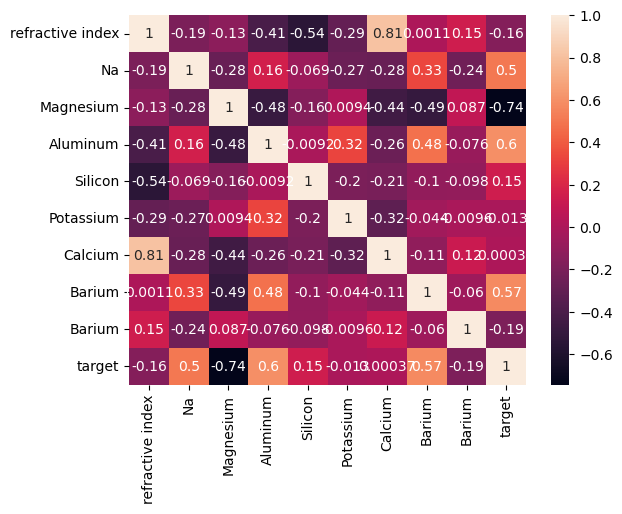

In [31]:
sns.heatmap(df.corr(),annot=True)

In [32]:
df.target.unique()

array([1, 2, 3, 5, 6, 7])

In [49]:
df['target']=[1 if x<=4 else 0 for x in df['target']]
df

TypeError: '<=' not supported between instances of 'str' and 'int'

In [53]:
df['target']=[1 if x<=4 else 0 for x in df['target']]
df

TypeError: '<=' not supported between instances of 'str' and 'int'

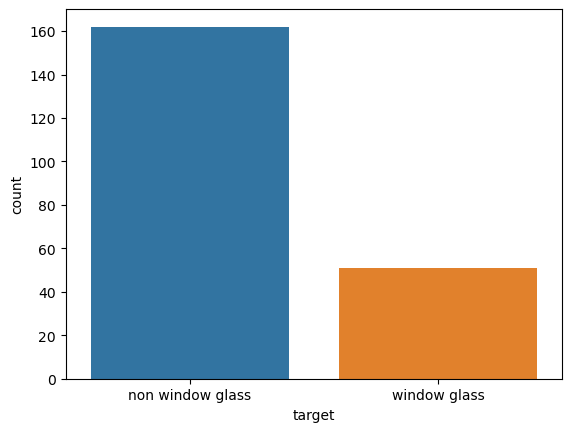

In [55]:
sns.countplot(df['target'])
plt.show()

In [57]:
x=df.drop('target',axis=1)
y=df['target']

In [58]:
#data is imbalanced

from imblearn.over_sampling import SMOTE

x_res,y_res=SMOTE().fit_resample(x,y)

y_res.value_counts()

non window glass    162
window glass        162
Name: target, dtype: int64

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.20,random_state=42)

In [41]:
print(y.shape,y_train.shape,y_test.shape)

(213,) (259,) (65,)


In [42]:
print(x.shape,x_train.shape,x_test.shape)

(213, 9) (259, 9) (65, 9)


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print(accuracy_score(y_test,pred))


0.9076923076923077


In [66]:
print(confusion_matrix(y_test,pred))

[[32  2]
 [ 4 27]]


In [67]:
print(classification_report(y_test,pred))

                  precision    recall  f1-score   support

non window glass       0.89      0.94      0.91        34
    window glass       0.93      0.87      0.90        31

        accuracy                           0.91        65
       macro avg       0.91      0.91      0.91        65
    weighted avg       0.91      0.91      0.91        65



In [75]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [76]:
dtc=DecisionTreeClassifier()
sv=SVC()
knn=KNeighborsClassifier()
mnb=MultinomialNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()




model=[dtc,sv,knn,mnb,RFC,GBC]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    
    print('\n')

accuracy score of DecisionTreeClassifier() is:
0.9384615384615385
[[31  3]
 [ 1 30]]
                  precision    recall  f1-score   support

non window glass       0.97      0.91      0.94        34
    window glass       0.91      0.97      0.94        31

        accuracy                           0.94        65
       macro avg       0.94      0.94      0.94        65
    weighted avg       0.94      0.94      0.94        65



accuracy score of SVC() is:
0.47692307692307695
[[ 0 34]
 [ 0 31]]
                  precision    recall  f1-score   support

non window glass       0.00      0.00      0.00        34
    window glass       0.48      1.00      0.65        31

        accuracy                           0.48        65
       macro avg       0.24      0.50      0.32        65
    weighted avg       0.23      0.48      0.31        65



accuracy score of KNeighborsClassifier() is:
0.9230769230769231
[[30  4]
 [ 1 30]]
                  precision    recall  f1-score   support



In [ ]:
#our best model is  GRADIENTBOOSTINGCLASSIFIER

In [77]:
import joblib

#from sklearn.externals import joblib
#save the model as a object file

joblib.dump(dtc,'GBCfile.obj')
#load the model from file

MODEL=joblib.load('GBCfile.obj')

#use the loaded model to make predictions

MODEL.predict(x_test)

array(['non window glass', 'window glass', 'non window glass',
       'non window glass', 'window glass', 'non window glass',
       'window glass', 'window glass', 'window glass', 'non window glass',
       'window glass', 'window glass', 'window glass', 'non window glass',
       'non window glass', 'window glass', 'window glass',
       'non window glass', 'non window glass', 'non window glass',
       'window glass', 'window glass', 'non window glass',
       'non window glass', 'non window glass', 'non window glass',
       'window glass', 'non window glass', 'non window glass',
       'window glass', 'non window glass', 'window glass', 'window glass',
       'window glass', 'window glass', 'window glass', 'non window glass',
       'non window glass', 'window glass', 'window glass', 'window glass',
       'non window glass', 'window glass', 'window glass',
       'non window glass', 'window glass', 'window glass', 'window glass',
       'non window glass', 'non window glass', 'no

In [80]:
conclusion=pd.DataFrame([MODEL.predict(x_test)[:],y_test[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
predicted,non window glass,window glass,non window glass,non window glass,window glass,non window glass,window glass,window glass,window glass,non window glass,...,window glass,window glass,window glass,non window glass,non window glass,window glass,window glass,non window glass,non window glass,window glass
original,non window glass,non window glass,non window glass,non window glass,window glass,non window glass,window glass,window glass,window glass,non window glass,...,window glass,window glass,window glass,non window glass,non window glass,non window glass,window glass,non window glass,non window glass,window glass


In [81]:
result=MODEL.score(x_test,y_test)
print(result*100)

93.84615384615384


# QUESTION2

In [83]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [84]:
df.shape

(571, 43)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [86]:
df.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [87]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64


A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


A     151
A-    134
B+     60
B      51

In [88]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64